In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from ligo.skymap.io import fits
from ligo.skymap import plot

In [3]:
from ligo.skymap import postprocess
import astropy_healpix as ah
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy import units as u

In [4]:
skymap, metadata = fits.read_sky_map('./post/fig/gw190711.fits', nest=None)
nside = ah.npix_to_nside(len(skymap))

In [5]:
skymap

array([4.55340762e-92, 4.55340762e-92, 4.55340762e-92, ...,
       1.26083717e-08, 1.26083717e-08, 1.26083717e-08])

In [6]:
# Convert sky map from probability to probability per square degree.
deg2perpix = ah.nside_to_pixel_area(nside).to_value(u.deg**2)
probperdeg2 = skymap / deg2perpix

<IPython.core.display.Javascript object>


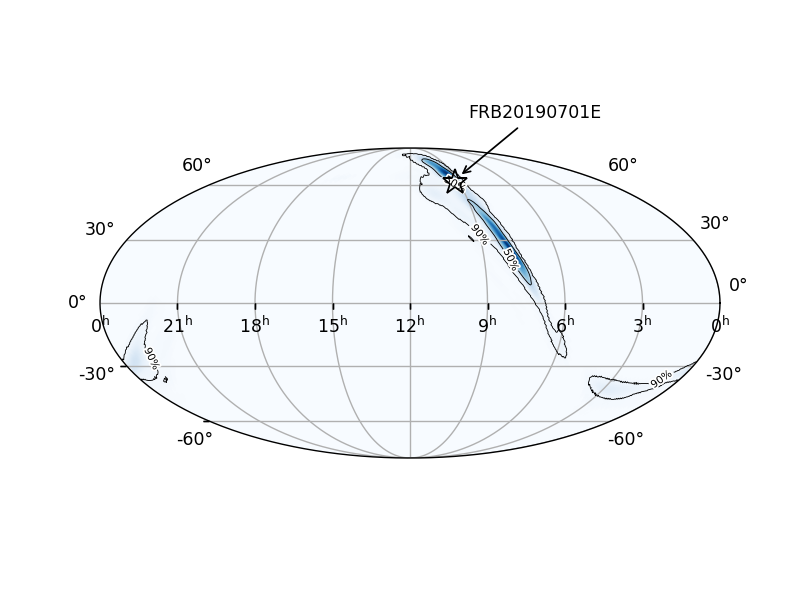

In [7]:
axes_args = {}
axes_args['projection'] = 'astro mollweide'
ax = plt.axes(**axes_args)
ax.grid()

In [8]:
# Plot sky map.
vmax = probperdeg2.max()
ax.imshow_hpx(
        (probperdeg2, 'ICRS'), nested=metadata['nest'], vmin=0., vmax=vmax,cmap='Blues')

In [9]:
cls = 100 * postprocess.find_greedy_credible_levels(skymap)
cs = ax.contour_hpx(
            (cls, 'ICRS'), nested=metadata['nest'],
            colors='k', linewidths=0.5, levels=[50,90])
fmt = r'%g\%%' if rcParams['text.usetex'] else '%g%%'
plt.clabel(cs, fmt=fmt, fontsize=6, inline=True)

<a list of 5 text.Text objects>

In [10]:
# Add a white outline to all text to make it stand out from the background.
plot.outline_text(ax)

In [11]:
ra =138.57
dec = 61.71
ax.plot_coord(
            SkyCoord(ra, dec, unit='deg'), '*',
            markerfacecolor='None', markeredgecolor='black', markersize=15,zorder=4)
ax.annotate('FRB20190701E',xy=(370,290),arrowprops=dict(arrowstyle='->'),xytext=(380,350))

Text(380, 350, 'FRB20190701E')

In [14]:
plt.savefig('sky.png')

In [12]:
contour = [50,90]

In [13]:
contour = [50,90]